# Lib

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from fbprophet import Prophet

plt.style.use('ggplot')
plt.rc('font', family='NanumGothic')

# Load Data

In [58]:
import pandas as pd

df = pd.read_csv('./data/findata.csv')
df = df.rename(columns={'Unnamed: 0': 'Date'})
df.index = df['Date']
df.drop(['Date'], axis=1, inplace=True)
df

,외국인 보유금액 (단위:조원),외환보유액(단위:억달러),FTSE지수(종가기준),MSCI지수(종가기준),2013년물(USD),"2014년물(4월,USD)","2014년물(9월,USD)",2015년물(EUR),2016년물(USD),2019년물(USD),...,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,미국 연준 금리(평균),AAII(경제전망 단위: %),외국인투자 VIX
Date,,,,,,,,,,,,,,,,,,,,,
200408월,165.6,"1,705",103.86,237.37,69,-,-,-,-,-,...,3.82,4.01,4.33,4.38,3.70,3.60,3.50,1.429,2.975,15.290
200409월,173.1,"1,745",107.45,245.87,75,-,97,-,-,-,...,3.59,3.75,4.14,4.10,3.52,3.52,3.50,1.605,15.940,13.340
200410월,171.3,"1,784",107.08,243.79,56,-,73,-,-,-,...,3.54,3.67,4.05,4.01,3.52,3.52,3.50,1.760,19.500,16.270
200411월,179.1,"1,926",111.54,252.75,62,-,85,-,-,-,...,3.42,3.53,3.96,3.86,3.42,3.34,3.25,1.932,34.900,13.240
200412월,179.7,"1,991",113.59,256.4,66,-,82,-,-,-,...,3.28,3.39,3.85,3.73,3.39,3.27,3.25,2.156,34.600,13.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202206월,593.0,"4,383",340.45,706.72,-,-,-,-,-,-,...,3.48,3.65,3.64,4.23,1.99,1.75,1.75,1.187,-26.960,28.709
202207월,629.9,"4,386",359.64,748.12,-,-,-,-,-,-,...,3.24,3.30,3.30,4.13,2.41,1.97,2.25,1.654,-19.500,21.330
202208월,629.9,"4,364",358.50,744.58,-,-,-,-,-,-,...,3.25,3.30,3.32,4.23,2.79,2.26,2.50,2.330,-7.825,25.870


In [63]:
df = df.replace('-', '0')
for col in df.columns :
    if df[col].dtype == 'float64'  :
        continue
    
    elif df[col].dtype == 'object' :
        print(f'Column : {col}')
        df[col] = df[col].str.replace(',', '').astype('float')
        
df.dropna(inplace=True)
df

,외국인 보유금액 (단위:조원),외환보유액(단위:억달러),FTSE지수(종가기준),MSCI지수(종가기준),2013년물(USD),"2014년물(4월,USD)","2014년물(9월,USD)",2015년물(EUR),2016년물(USD),2019년물(USD),...,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,미국 연준 금리(평균),AAII(경제전망 단위: %),외국인투자 VIX
Date,,,,,,,,,,,,,,,,,,,,,
200408월,165.6,1705.0,103.86,237.37,69.0,0.0,0.0,0.0,0.0,0.0,...,3.82,4.01,4.33,4.38,3.70,3.60,3.50,1.429,2.975,15.290
200409월,173.1,1745.0,107.45,245.87,75.0,0.0,97.0,0.0,0.0,0.0,...,3.59,3.75,4.14,4.10,3.52,3.52,3.50,1.605,15.940,13.340
200410월,171.3,1784.0,107.08,243.79,56.0,0.0,73.0,0.0,0.0,0.0,...,3.54,3.67,4.05,4.01,3.52,3.52,3.50,1.760,19.500,16.270
200411월,179.1,1926.0,111.54,252.75,62.0,0.0,85.0,0.0,0.0,0.0,...,3.42,3.53,3.96,3.86,3.42,3.34,3.25,1.932,34.900,13.240
200412월,179.7,1991.0,113.59,256.40,66.0,0.0,82.0,0.0,0.0,0.0,...,3.28,3.39,3.85,3.73,3.39,3.27,3.25,2.156,34.600,13.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202205월,695.3,4477.0,392.18,814.54,0.0,0.0,0.0,0.0,0.0,0.0,...,3.02,3.23,3.30,3.78,1.77,1.51,1.75,0.758,-27.175,26.190
202206월,593.0,4383.0,340.45,706.72,0.0,0.0,0.0,0.0,0.0,0.0,...,3.48,3.65,3.64,4.23,1.99,1.75,1.75,1.187,-26.960,28.709
202207월,629.9,4386.0,359.64,748.12,0.0,0.0,0.0,0.0,0.0,0.0,...,3.24,3.30,3.30,4.13,2.41,1.97,2.25,1.654,-19.500,21.330


In [65]:
print(f'결측치의 수 \n {df.isnull().sum()}')

결측치의 수 
 외국인 보유금액 (단위:조원)    0
외환보유액(단위:억달러)       0
FTSE지수(종가기준)        0
MSCI지수(종가기준)        0
2013년물(USD)         0
2014년물(4월,USD)      0
2014년물(9월,USD)      0
2015년물(EUR)         0
2016년물(USD)         0
2019년물(USD)         0
2023년물(USD)         0
2024년물(USD)         0
2027년물(USD)         0
2028년물(USD)         0
2029년물(USD)         0
2044년물(USD)         0
2048년물(USD)         0
국고채 3년(평균)          0
국고채 5년(평균)          0
국고채 10년(평균)         0
회사채 3년(평균)          0
CD 91물(평균)          0
콜금리(1일물,평균)         0
기준금리                0
미국 연준 금리(평균)        0
AAII(경제전망 단위: %)    0
외국인투자 VIX           0
dtype: int64


# 시각화

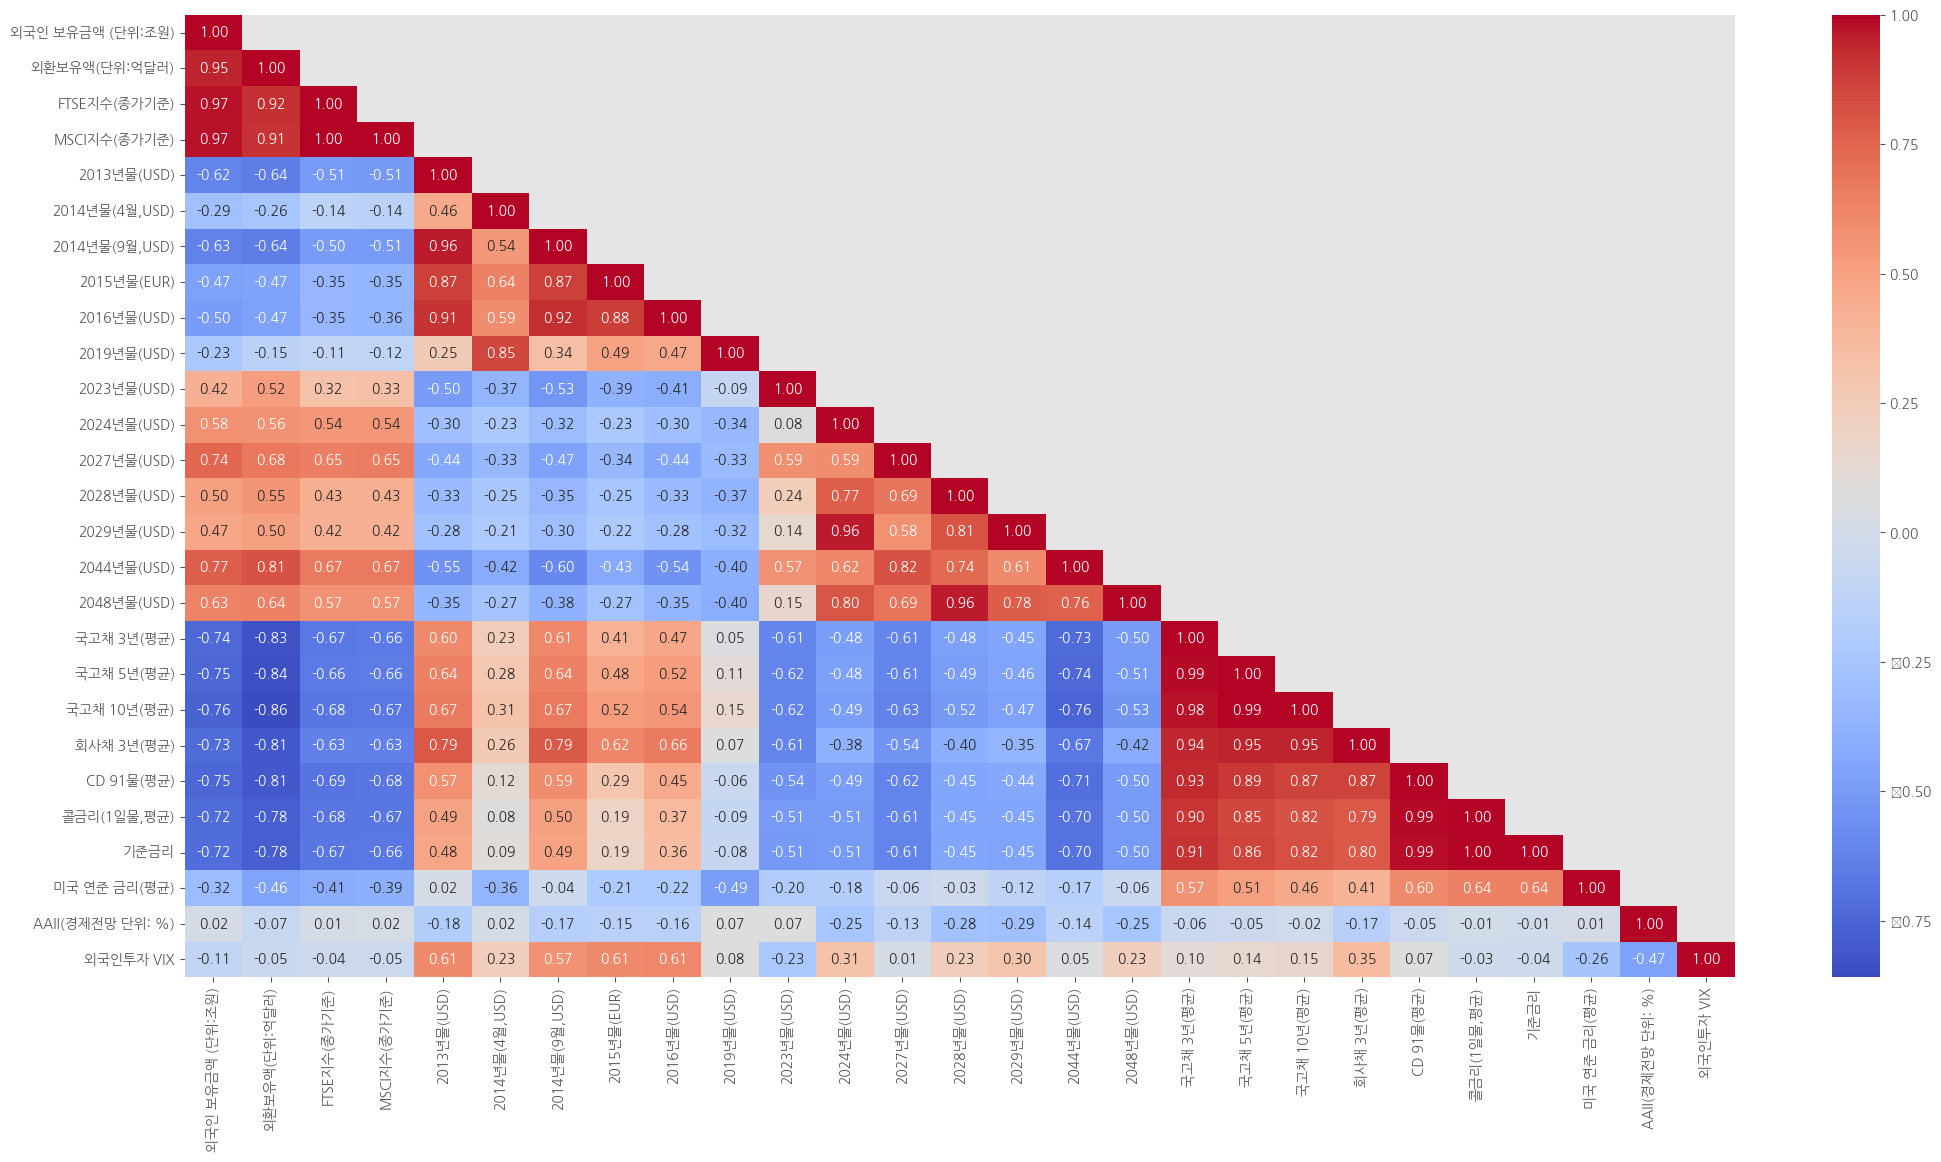

In [109]:
mat = df.corr()
fig, ax = plt.subplots(figsize=(25, 12.5))
sns.heatmap(mat, annot = True, fmt='.2f', cmap='coolwarm', mask = np.triu(mat,1))
plt.show()

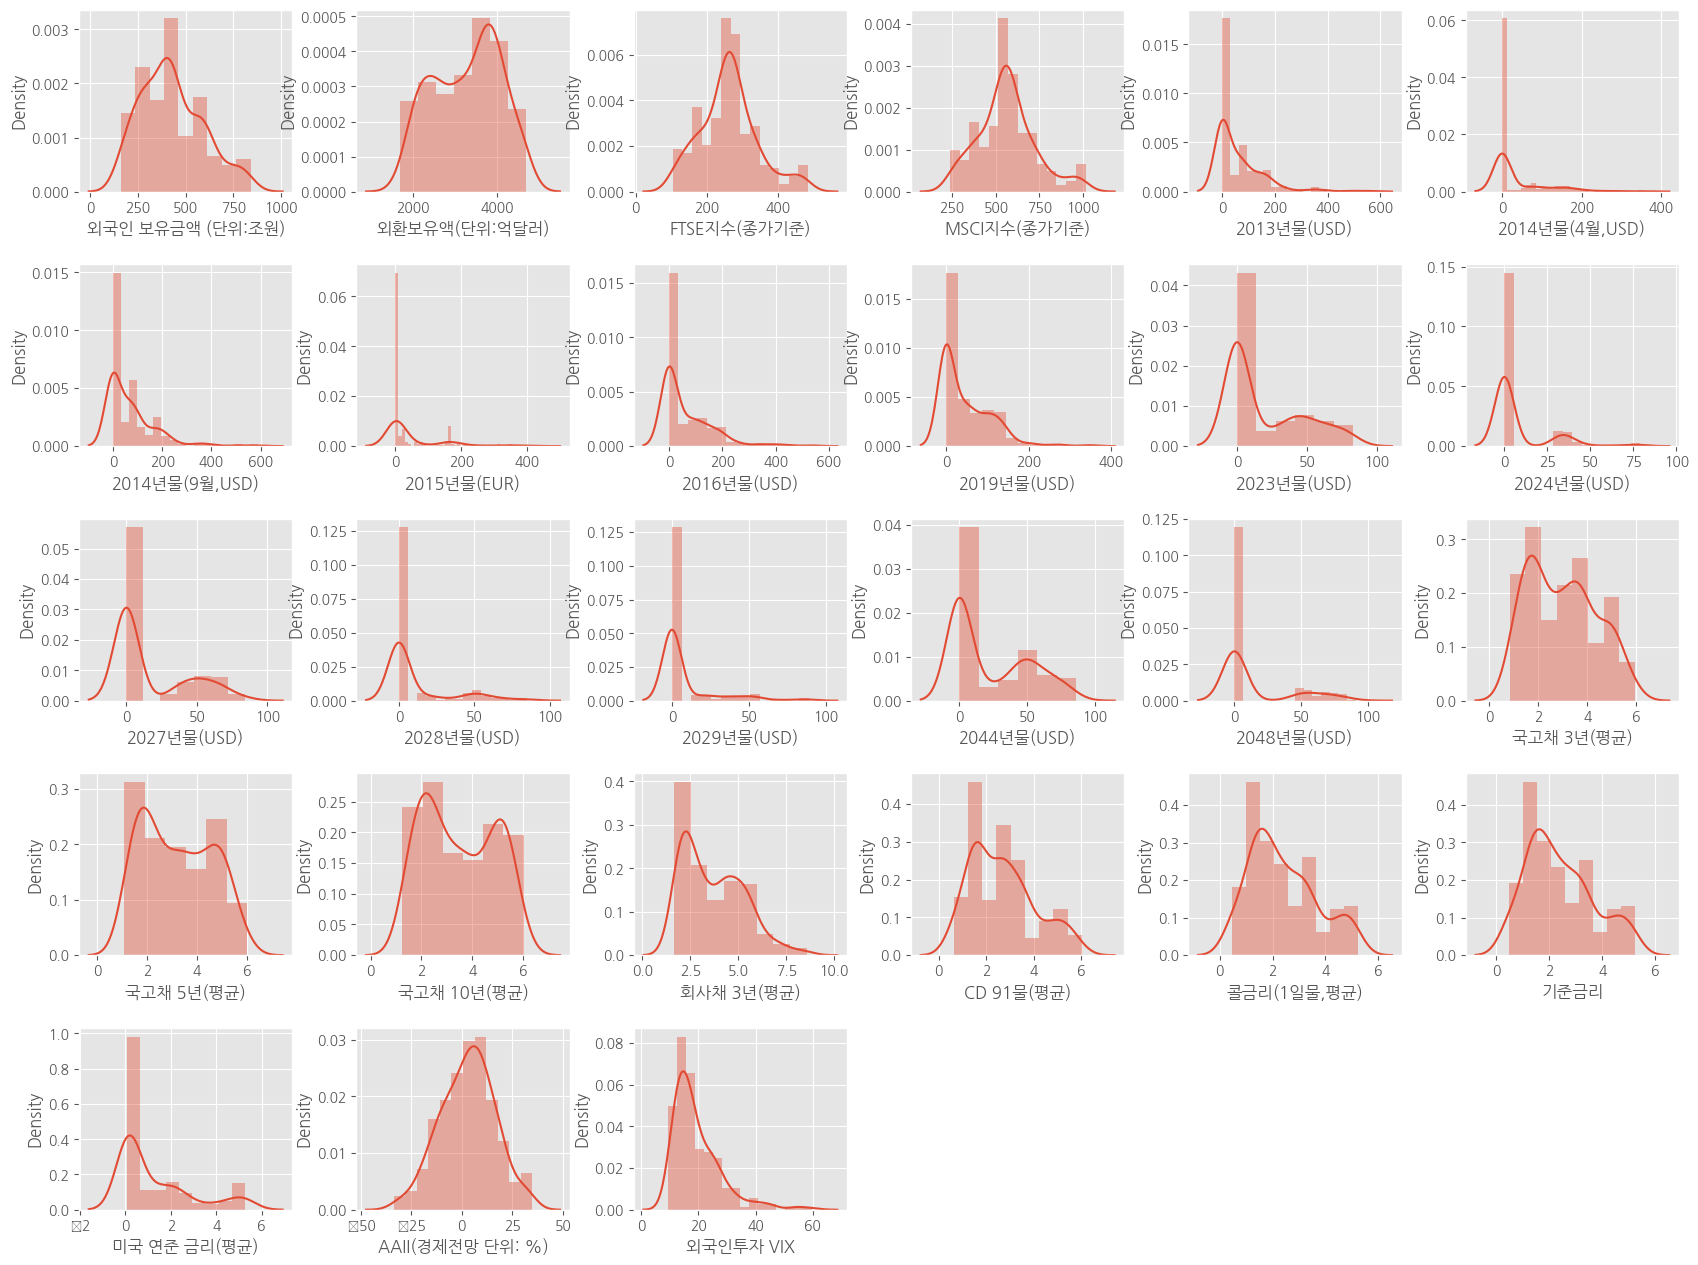

In [97]:
plt.figure(figsize=(20,15))

for idx, col in enumerate(df.columns) :
    plt.subplot(5,6, idx+1)
    sns.distplot(df[col])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

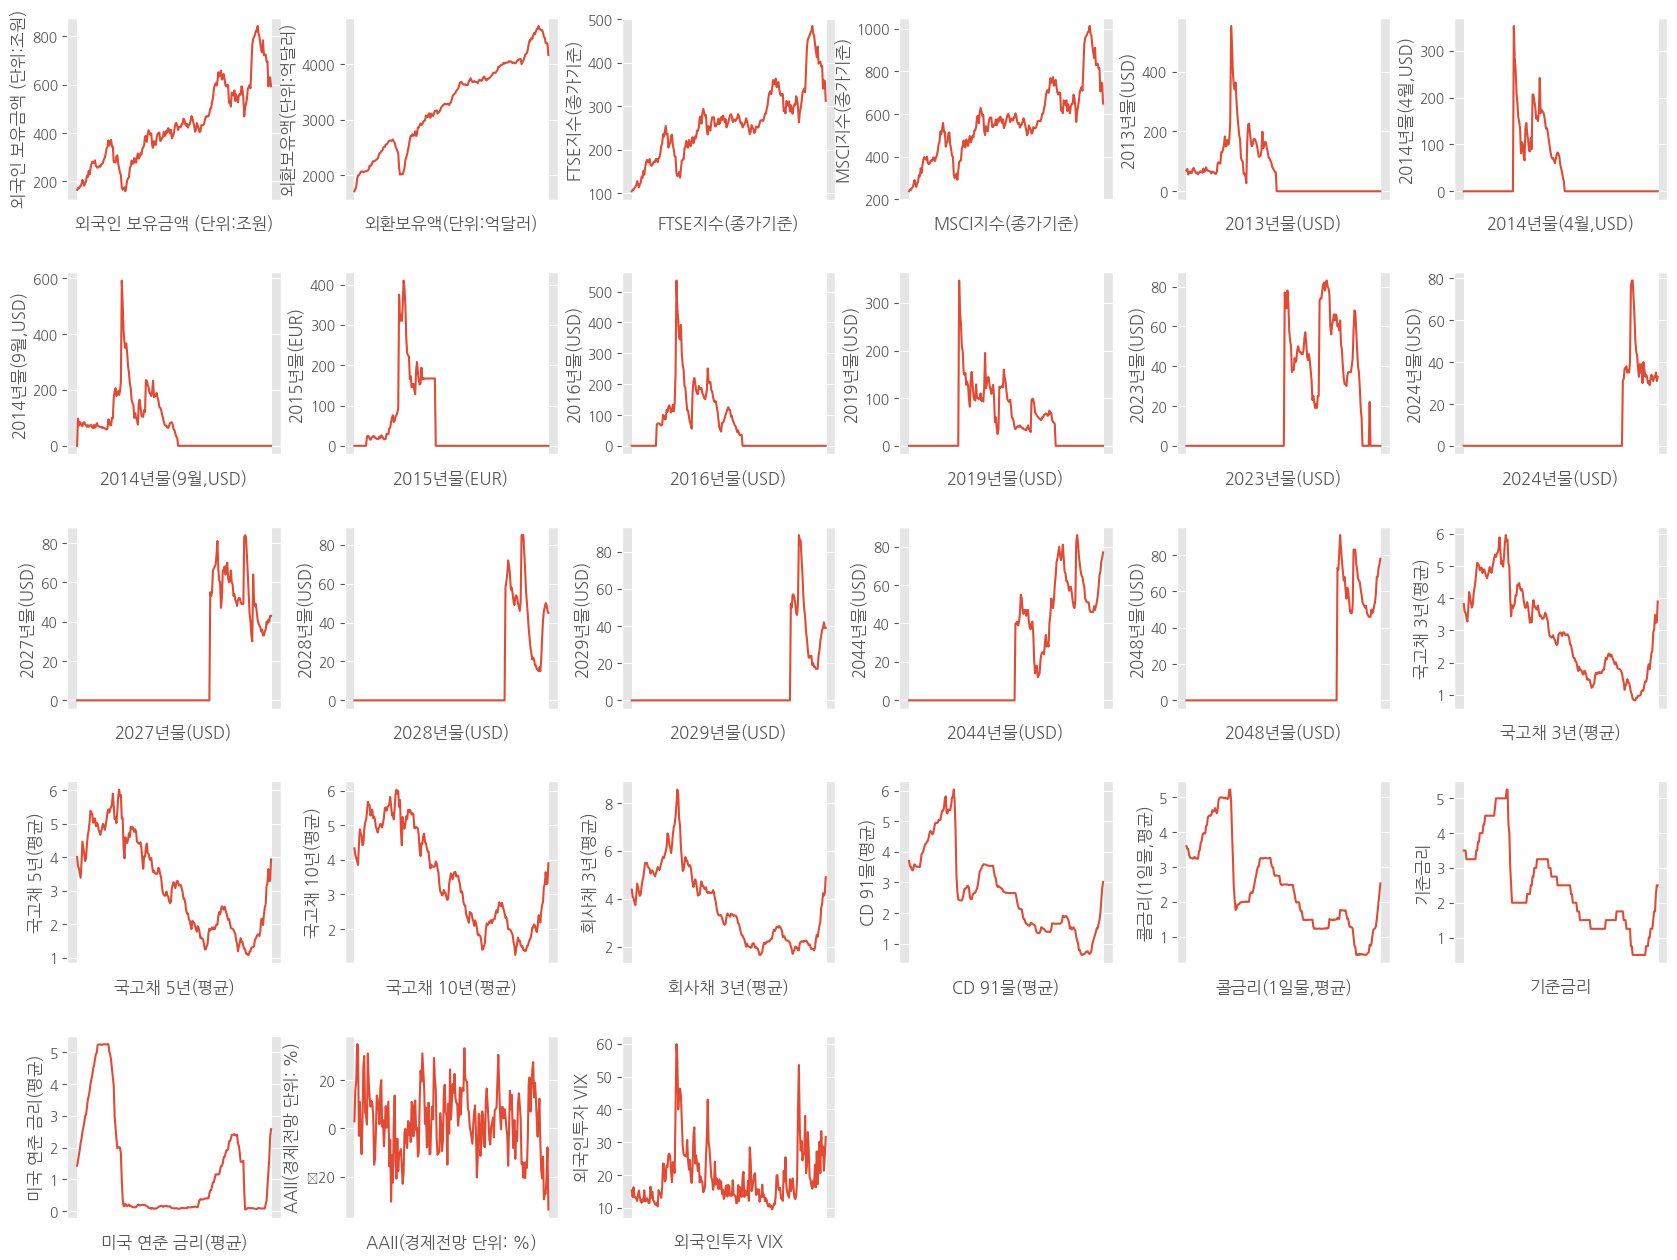

In [110]:
plt.figure(figsize=(20,15))

for idx, col in enumerate(df.columns) :
    plt.subplot(5,6, idx+1)
    x = sns.lineplot(x = df.index, y = df[col])
    x.set(xticklabels=[], xlabel=col)
    x.tick_params(bottom=False)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()